In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as mticker
import matplotlib.cm as cm
import pickle as pkl


cwd = os.getcwd()
model_path = os.path.abspath(os.path.join(cwd, os.pardir, 'models'))
sys.path.append(model_path)
from conference_model import *

In [ ]:
# Parameters
s1 = 1/3.4
p_sev = 0.45
efficacy = 0.7
g_mild = 1/2.9
g_sev = 1/5.7
R0 = 2.8
t_interv = 0
t_end_conf = 5

prop_dict = {
    'Once daily': {'Mean': 0.78, 'SD': 0.14},
    'Twice daily': {'Mean': 0.69, 'SD': 0.15},
    '3 times a day': {'Mean': 0.64, 'SD': 0.15},
    '4 times a day': {'Mean': 0.51, 'SD': 0.20},
}

# Simulation setup
nr = 1000  # Number of realisations
Tmax = 50
dt = 0.01

with open('../data/conference_simulation_results.pkl', 'rb') as f:
    data = pkl.load(f)

new_time_points = data['new_time_points']
IsimTot_untreated = data['IsimTot_untreated']
cumul_infections_untreated = data['cumul_infections_untreated']
t_end_conf = data['t_end_conf']
results = data['results']


/var/folders/v2/rqs_xyvn6b35jq2hrnw5_fsr0000gp/T/ipykernel_2267/1647409658.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = cm.get_cmap('viridis', 4)


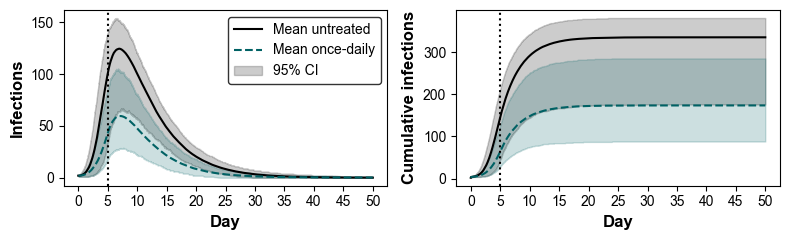

In [3]:
plt.rcParams['font.family'] = 'Arial'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 2.5))

# Data preparation for the first subplot
new_time_points = np.arange(0, Tmax, dt)
mean_untreated = np.mean(IsimTot_untreated, axis=0)
perc25_untreated = np.percentile(IsimTot_untreated, 2.5, axis=0)
perc975_untreated = np.percentile(IsimTot_untreated, 97.5, axis=0)

# Data preparation for the second subplot
mean_cumul_untreated = np.mean(cumul_infections_untreated, axis=0)
cumul_perc25_untreated = np.percentile(cumul_infections_untreated, 2.5, axis=0)
cumul_perc975_untreated = np.percentile(cumul_infections_untreated, 97.5, axis=0)

# Plot for untreated scenario - only once, in black
ax1.plot(new_time_points, mean_untreated, color='black', label='Mean untreated')
ax1.fill_between(new_time_points, perc25_untreated, perc975_untreated, color='black', alpha=0.2)
ax2.plot(new_time_points, mean_cumul_untreated, color='black', label='mean untreated')
ax2.fill_between(new_time_points, cumul_perc25_untreated, cumul_perc975_untreated, color='black', alpha=0.2)

# Define the color map and line styles
color_map = cm.get_cmap('viridis', 4)
line_styles = ['--', '-','-','-.']

# Loop through the first two treated scenarios only
for index, (scenario, values) in enumerate(results.items()):
    if index >= 1:  # Skip after the first two
        continue

    color = '#006164'
    line_style = line_styles[index]

    # Data preparation from the stored results
    IsimTot_treated_mean = values['Mean infections']
    IsimTot_treated_perc25 = values['Lower infections']
    IsimTot_treated_perc975 = values['Upper infections']
    cumul_infections_treated_mean = values['Mean cumul infections']
    cumul_infections_treated_perc25 = values['Lower cumul infections']
    cumul_infections_treated_perc975 = values['Upper cumul infections']
    
    # Plot for the first subplot with different line styles
    ax1.plot(new_time_points, IsimTot_treated_mean, color=color, linestyle=line_style, label='Mean once-daily')
    ax1.fill_between(new_time_points, IsimTot_treated_perc25, IsimTot_treated_perc975, color=color, alpha=0.2)
    
    # Plot for the second subplot with different line styles
    ax2.plot(new_time_points, cumul_infections_treated_mean, color=color, linestyle=line_style, label=f'Mean {scenario.lower()}')
    ax2.fill_between(new_time_points, cumul_infections_treated_perc25, cumul_infections_treated_perc975, color=color, alpha=0.2)

# Common plot adjustments
for ax in [ax1, ax2]:
    ax.axvline(x=t_end_conf, color='black', linestyle=':')
    # ax.text(t_end_conf, 0.99, 'conference ends', ha='right', va='top', rotation=90, transform=ax.get_xaxis_transform())
    ax.set_xlabel('Day', weight='bold', fontsize=12)
    ax.xaxis.set_major_locator(mticker.MultipleLocator(5))

ax1.set_ylabel('Infections', weight='bold', fontsize=12)
ax2.set_ylabel('Cumulative infections', weight='bold', fontsize=12)

ax1.fill_between([np.nan, np.nan], [np.nan, np.nan], color='black', alpha=0.2, label='95% CI')
# Adding legends
ax1.legend(edgecolor='black')

plt.tight_layout()

# Define the directory path and the filename
directory = '../figures'
filename = 'figure4e.svg'

# Check if the directory exists
if not os.path.exists(directory):
    # If the directory does not exist, create it
    os.makedirs(directory)

# Save the figure
plt.savefig(os.path.join(directory, filename), bbox_inches='tight')
plt.show()

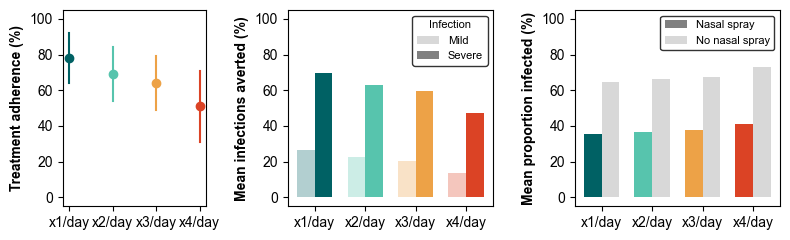

In [4]:
plt.rcParams['font.family'] = 'Arial'
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 2.5), gridspec_kw={'width_ratios': [0.7, 1, 1]})  # Three subplots

colors = ['#006164', '#57C4AD', '#EDA247', '#DB4325']
labels = []
x_index = 1

all_y_values = []

# Subplot 1 – Treatment adherence
for i, (scenario, values) in enumerate(prop_dict.items()):
    mean_adherence = values['Mean']
    sd_adherence = values['SD']
    all_y_values.extend([mean_adherence - sd_adherence, mean_adherence + sd_adherence])

    color = colors[i]
    ax1.plot([x_index, x_index], [mean_adherence - sd_adherence, mean_adherence + sd_adherence], color=color)
    ax1.plot(x_index, mean_adherence, 'o', color=color)
    labels.append(scenario)
    x_index += 1

xtick_labels = [f'x{i}/day' for i in range(1, len(labels) + 1)]
ax1.set_xticks(range(1, len(labels) + 1))
ax1.set_xticklabels(xtick_labels)
ax1.set_ylabel('Treatment adherence (%)', weight='bold')

# Subplot 2 – Combined mild and severe infections averted as grouped bars
# Convert nested dictionary to DataFrame

n = len(labels)
x = np.arange(n)  # base x positions
bar_width = 0.35

mild_means = []
severe_means = []

mild_means = []
severe_means = []

keys = list(results.keys())
for i in range(len(keys)):
    entry = results[keys[i]]
    mild = max(0, entry['Mean mild infections averted'])
    severe = max(0, entry['Mean severe infections averted'])
    mild_means.append(mild)
    severe_means.append(severe)
    all_y_values.extend([mild, severe])

# Plot mild infections (lighter bars)
for i in range(n):
    ax2.bar(x[i] - bar_width/2, mild_means[i], width=bar_width, color=colors[i], alpha=0.3)

# Plot severe infections (solid bars)
for i in range(n):
    ax2.bar(x[i] + bar_width/2, severe_means[i], width=bar_width, color=colors[i], alpha=1.0)

ax2.set_xticks(x)
ax2.set_xticklabels(xtick_labels)
ax2.set_ylabel('Mean infections averted (%)', weight='bold')
ax2.bar(np.nan, np.nan, color='grey', alpha=0.3, label='Mild')
ax2.bar(np.nan, np.nan, color='grey', alpha=1, label='Severe')
ax2.legend(title='Infection', edgecolor='black', fontsize=8, title_fontsize=8)


# Subplot 3 – Placeholder (empty)
# Read results from CSV
results = pd.read_csv('../data/spray_nospray_results.csv', index_col=0).to_dict(orient='index')

# Define the four colors used previously
spray_colors = ['#006164', '#57C4AD', '#EDA247', '#DB4325']
nospray_color = 'lightgrey'

# Extract scenarios and compute proportions
scenarios = list(results.keys())
percent_unprotected = [
    results[sc]['Mean unprotected exposures'] / results[sc]['Mean total unprotected']
    for sc in scenarios
]
percent_protected = [
    results[sc]['Mean protected exposures'] / results[sc]['Mean total protected']
    for sc in scenarios
]

# Indices and width for bar positions
ind = np.arange(len(scenarios))
width = 0.35

# Colors: grey for no spray, spray_colors for nasal spray
ax3.bar(np.nan, np.nan, width, color='grey', label='Nasal spray')
bars_protected = ax3.bar(ind - width/2, percent_protected, width, color=spray_colors)
bars_unprotected = ax3.bar(ind + width/2, percent_unprotected, width, label='No nasal spray', color='grey', alpha=0.3)

# Labels and formatting
ax3.set_ylabel('Mean proportion infected (%)', weight='bold')
ax3.set_xticks(ind)
ax3.set_xticklabels(scenarios)

# Y-axis formatter (multiplied by 100, no % sign)
formatter = FuncFormatter(lambda y, _: f'{y * 100:.0f}')
ax3.yaxis.set_major_formatter(formatter)

# Optional legend
ax3.legend(loc='upper right', fontsize=8, edgecolor='black')

# Shared y-axis limits and formatter
ylim = (-0.05, 1.05)
ax1.set_ylim(*ylim)
ax2.set_ylim(*ylim)
ax3.set_ylim(*ylim)

formatter = FuncFormatter(lambda y, _: f'{y * 100:.0f}')
ax1.yaxis.set_major_formatter(formatter)
ax2.yaxis.set_major_formatter(formatter)
ax3.yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()